# Logistic Regression
I will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).
I'll try to predict a classification- survival or deceased.
I'll use a "semi-cleaned" version of the titanic data set

** Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!
## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

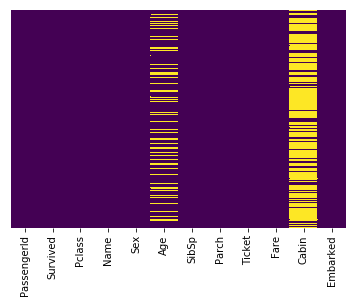

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of **imputation.** Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

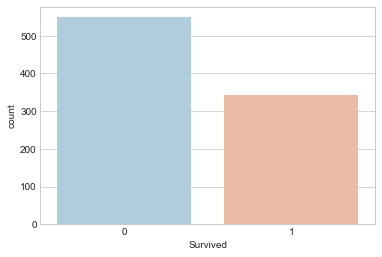

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

 * 0 : Deceased
 * 1 : Survived 

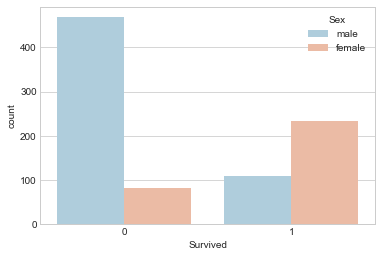

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

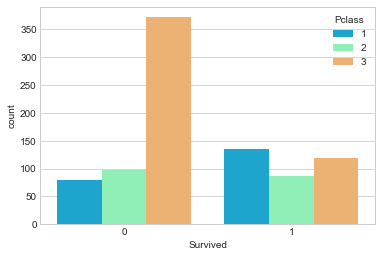

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

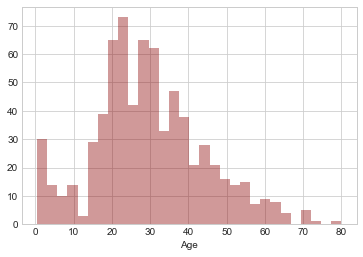

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30,color='darkred')
##train['Age'].hist(bins=30,color='darkred',alpha=0.7)

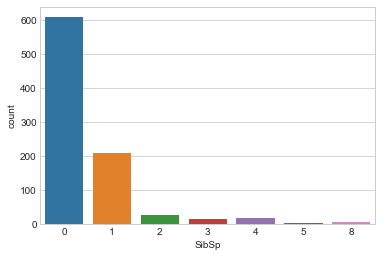

In [9]:
sns.countplot(x='SibSp',data=train)

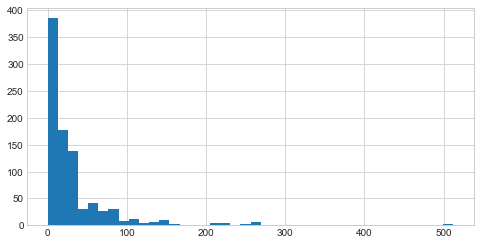

In [10]:
train['Fare'].hist(bins=40,figsize=(8,4))

## Data Cleaning
I want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

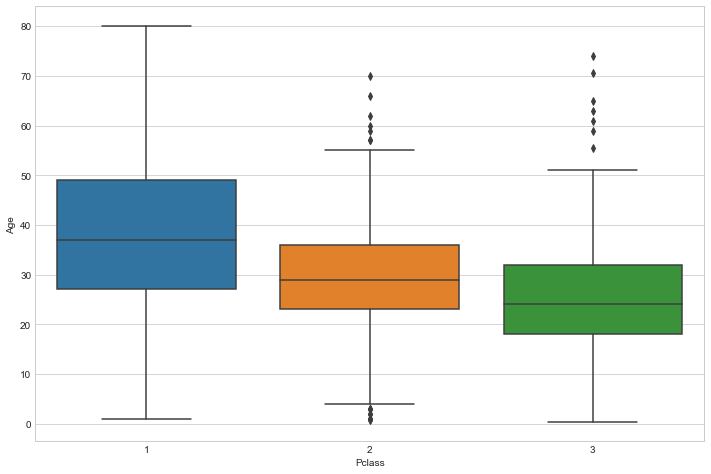

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [12]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if(pd.isnull(Age)):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply that function!

In [13]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

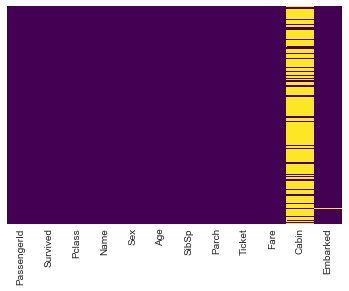

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [15]:
train.drop('Cabin',axis=1,inplace=True)

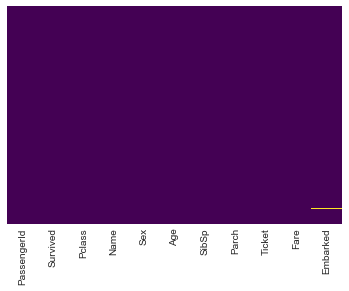

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

so we have one or few missing data in Embarked column.


In [17]:
train.dropna(inplace=True)

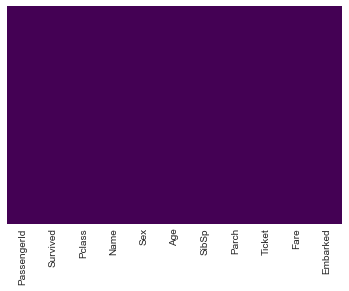

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting categorical Features

I'll need to convert categorical features to dummy variables using pandas! Otherwise  machine learning algorithm won't be able to directly take in those features as inputs.

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
pd.get_dummies(train.Sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Here the one column defines another column, means if we have 0 in female column that means we have 1 in male column. So one column is enough for information.

In [21]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

Here we don't need **Name and Ticket** columns. Also we can drop **Sex and Embarked** columns as we have created categorical data for them.

In [22]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
train=pd.concat([train,sex,embark],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Wow! our data is now ready for model.

In [25]:
test=pd.read_csv('titanic_test.csv')

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


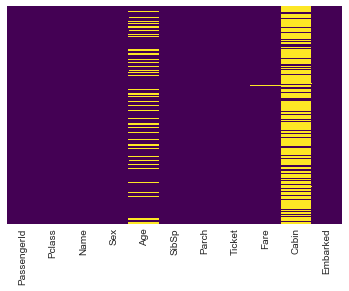

In [27]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

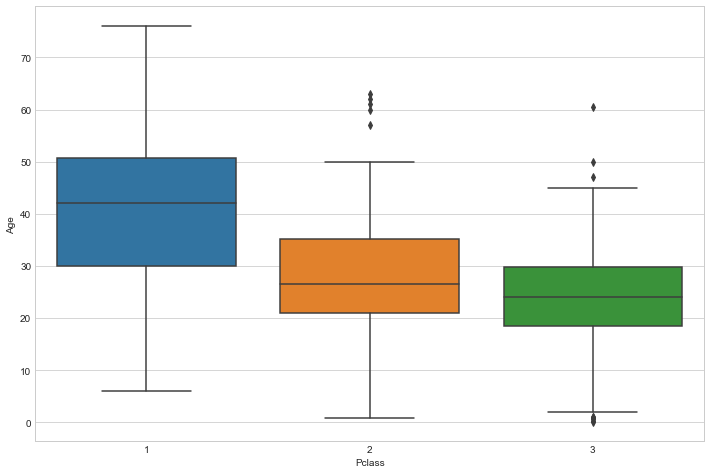

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=test)

In [29]:
test.groupby(['Pclass'])['Age'].sum()


Pclass
1    4010.00
2    2532.42
3    3508.08
Name: Age, dtype: float64

In [30]:
test.groupby(['Pclass'])['Age'].count().dropna()

Pclass
1     98
2     88
3    146
Name: Age, dtype: int64

In [31]:
def impute_tAge(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 43
        if Pclass ==2:
            return 26
        else:
            return 24
    else:
        return Age

In [32]:
test['Age']=test[['Age','Pclass']].apply(impute_tAge,axis=1)

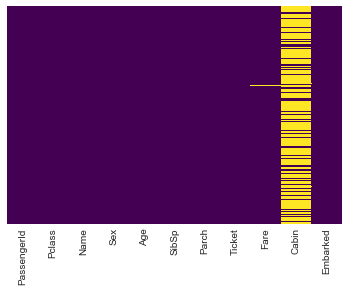

In [33]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
test.drop('Cabin',axis=1,inplace=True)

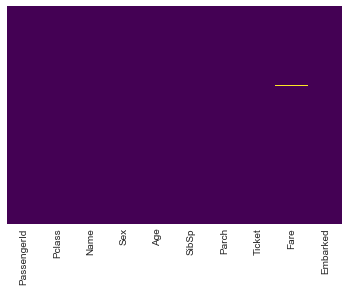

In [35]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
test.dropna(inplace=True)

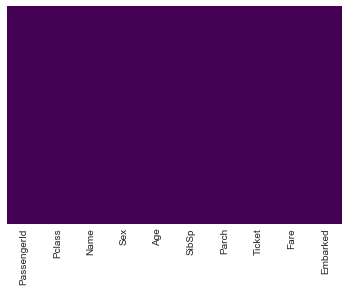

In [37]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Embarked       417 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [40]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [41]:
test.drop(['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [42]:
test=pd.concat([test,sex,embark],axis=1)

In [43]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


# Building a Logistic Regression model


In [44]:
x_train=train.drop('Survived',axis=1)

In [45]:
y_train=train['Survived']

## Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel=LogisticRegression()

In [48]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
predictions=logmodel.predict(test)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis=1),  train['Survived'], test_size=0.30, random_state=101)

In [52]:
train_predictions = logmodel.predict(X_test)

## Evaluation
To evaluate the method we have to do splitting of available train data because we don't have Survived column in test data set

In [53]:
from sklearn.metrics import classification_report

In [54]:
print classification_report(Y_test,train_predictions)

             precision    recall  f1-score   support

          0       0.82      0.92      0.86       163
          1       0.84      0.67      0.75       104

avg / total       0.83      0.82      0.82       267



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(Y_test,train_predictions)

array([[150,  13],
       [ 34,  70]], dtype=int64)

Here a little bit about confusion matrix:
* 150 represents the True Negatives, means actual result for those 150 is No and our model also predicts No.
* 13 represents the False Positives(type 1 error) , means result for those 13 is NO but our model predicts Yes.
* 34 represents the False Negatives (type 2 error), means result for those 34 is Yes but our model predicts No.
* 70 represents the True Positives, means actual result is Yes and ou model also predicts Yes.

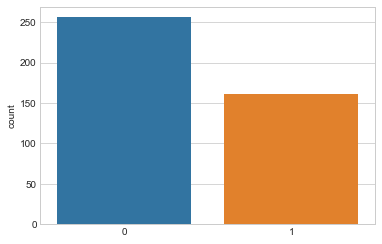

In [59]:
sns.countplot(x=predictions)